# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

1. There is a strong correlation between max temperature and latitude. As expected, the further you get from the equator the lower the max temperatures are.

2. There was not a strong correltaion between any of the other observed variables (cloudiness, humidity, wind speed) and the latitude of the city.

3. While looking at the "describe" data frame which shows the max and min of the different variables, I found that the randomly generated list of cities provided a good and unbiased set of data, with a large range between min and max values for all variables.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:

lon = np.random.uniform (low=-1.8, high=1.8, size=(2000)) * 100


lat = np.random.uniform (low=-0.9, high=0.9, size=(2000)) * 100


coordinates = np.stack((lat, lon), axis=-1)

cities_raw = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities_raw.append(citipy.nearest_city(lat, lon))
    
dup_items = set()
cities = []
for x in cities_raw:
    if x not in dup_items:
        cities.append(x)
        dup_items.add(x)
    
print(len(cities))

756


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

ow_date = []
ow_city = []
ow_country = []
ow_cloud = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

x = 1
    
for city in cities:
    
   
    name = city.city_name
    print("Processing Weather Data for Record "+ str(x) + " of " + str((len(cities))) + " | "  + name )
    
    query_url = url + "appid=" + weather_api_key + "&q=" + name + "&units=" + units
    
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
   

    try:
   
        ow_date.append(weather_data['dt'])
        ow_city.append(weather_data['name'])
        ow_country.append(weather_data['sys']['country'])
        ow_lat.append(weather_data['coord']['lat'])
        ow_lon.append(weather_data['coord']['lon'])
        ow_maxtmp.append(weather_data['main']['temp_max'])
        ow_humid.append(weather_data['main']['humidity'])
        ow_cloud.append(weather_data['clouds']['all'])
        ow_wind.append(weather_data['wind']['speed'])
        
        x = x + 1
            
    except:
             print("City not found, skipping...")
            
        

Processing Weather Data for Record 1 of 756 | katsuura
Processing Weather Data for Record 2 of 756 | rikitea
Processing Weather Data for Record 3 of 756 | saryozek
Processing Weather Data for Record 4 of 756 | ushuaia
Processing Weather Data for Record 5 of 756 | cape town
Processing Weather Data for Record 6 of 756 | jiamusi
Processing Weather Data for Record 7 of 756 | bluff
Processing Weather Data for Record 8 of 756 | carnarvon
Processing Weather Data for Record 9 of 756 | atuona
Processing Weather Data for Record 10 of 756 | arraial do cabo
Processing Weather Data for Record 11 of 756 | punta arenas
Processing Weather Data for Record 12 of 756 | saskylakh
Processing Weather Data for Record 13 of 756 | perez
Processing Weather Data for Record 14 of 756 | nemuro
Processing Weather Data for Record 15 of 756 | kainantu
Processing Weather Data for Record 16 of 756 | kapaa
Processing Weather Data for Record 17 of 756 | clyde river
Processing Weather Data for Record 18 of 756 | chitipa
P

Processing Weather Data for Record 135 of 756 | bengkulu
Processing Weather Data for Record 136 of 756 | sitka
Processing Weather Data for Record 137 of 756 | svetlogorsk
Processing Weather Data for Record 138 of 756 | sao filipe
Processing Weather Data for Record 139 of 756 | syamzha
Processing Weather Data for Record 140 of 756 | barentsburg
City not found, skipping...
Processing Weather Data for Record 140 of 756 | kinshasa
Processing Weather Data for Record 141 of 756 | khatanga
Processing Weather Data for Record 142 of 756 | fremont
Processing Weather Data for Record 143 of 756 | grindavik
Processing Weather Data for Record 144 of 756 | el vigia
Processing Weather Data for Record 145 of 756 | kaitangata
Processing Weather Data for Record 146 of 756 | iqaluit
Processing Weather Data for Record 147 of 756 | vao
Processing Weather Data for Record 148 of 756 | yeppoon
Processing Weather Data for Record 149 of 756 | kiunga
Processing Weather Data for Record 150 of 756 | guapore
Process

Processing Weather Data for Record 266 of 756 | raia
Processing Weather Data for Record 267 of 756 | hilo
Processing Weather Data for Record 268 of 756 | kushiro
Processing Weather Data for Record 269 of 756 | omboue
Processing Weather Data for Record 270 of 756 | kachiry
Processing Weather Data for Record 271 of 756 | ribas do rio pardo
Processing Weather Data for Record 272 of 756 | yarmouth
Processing Weather Data for Record 273 of 756 | dubbo
Processing Weather Data for Record 274 of 756 | hofn
Processing Weather Data for Record 275 of 756 | grand river south east
City not found, skipping...
Processing Weather Data for Record 275 of 756 | meyungs
City not found, skipping...
Processing Weather Data for Record 275 of 756 | amderma
City not found, skipping...
Processing Weather Data for Record 275 of 756 | izoplit
Processing Weather Data for Record 276 of 756 | mahon
Processing Weather Data for Record 277 of 756 | poronaysk
Processing Weather Data for Record 278 of 756 | sri aman
Proc

Processing Weather Data for Record 388 of 756 | altay
Processing Weather Data for Record 389 of 756 | ilhabela
Processing Weather Data for Record 390 of 756 | crixas
Processing Weather Data for Record 391 of 756 | taos
Processing Weather Data for Record 392 of 756 | zhigansk
Processing Weather Data for Record 393 of 756 | tumannyy
City not found, skipping...
Processing Weather Data for Record 393 of 756 | port hedland
Processing Weather Data for Record 394 of 756 | seoul
Processing Weather Data for Record 395 of 756 | santa rosa
Processing Weather Data for Record 396 of 756 | paamiut
Processing Weather Data for Record 397 of 756 | zhezkazgan
Processing Weather Data for Record 398 of 756 | san pedro
Processing Weather Data for Record 399 of 756 | bolshiye uki
City not found, skipping...
Processing Weather Data for Record 399 of 756 | huancavelica
Processing Weather Data for Record 400 of 756 | vila do maio
Processing Weather Data for Record 401 of 756 | ahipara
Processing Weather Data f

Processing Weather Data for Record 510 of 756 | garowe
Processing Weather Data for Record 511 of 756 | fort-shevchenko
Processing Weather Data for Record 512 of 756 | olafsvik
Processing Weather Data for Record 513 of 756 | santa maria
Processing Weather Data for Record 514 of 756 | benton harbor
Processing Weather Data for Record 515 of 756 | lumphat
Processing Weather Data for Record 516 of 756 | hellvik
Processing Weather Data for Record 517 of 756 | nago
Processing Weather Data for Record 518 of 756 | oktyabrskoye
Processing Weather Data for Record 519 of 756 | dawlatabad
Processing Weather Data for Record 520 of 756 | kilembe
Processing Weather Data for Record 521 of 756 | floro
Processing Weather Data for Record 522 of 756 | jawhar
Processing Weather Data for Record 523 of 756 | pimenta bueno
Processing Weather Data for Record 524 of 756 | jacmel
Processing Weather Data for Record 525 of 756 | sire
Processing Weather Data for Record 526 of 756 | zlitan
Processing Weather Data for

Processing Weather Data for Record 644 of 756 | esterhazy
Processing Weather Data for Record 645 of 756 | cabedelo
Processing Weather Data for Record 646 of 756 | taua
Processing Weather Data for Record 647 of 756 | tuatapere
Processing Weather Data for Record 648 of 756 | sungaipenuh
Processing Weather Data for Record 649 of 756 | oriximina
Processing Weather Data for Record 650 of 756 | shitanjing
Processing Weather Data for Record 651 of 756 | aklavik
Processing Weather Data for Record 652 of 756 | sakaiminato
Processing Weather Data for Record 653 of 756 | glenluce
Processing Weather Data for Record 654 of 756 | santiago de cao
Processing Weather Data for Record 655 of 756 | placerville
Processing Weather Data for Record 656 of 756 | raffadali
Processing Weather Data for Record 657 of 756 | sterling
Processing Weather Data for Record 658 of 756 | aleksandrov gay
Processing Weather Data for Record 659 of 756 | palaikastron
Processing Weather Data for Record 660 of 756 | nyurba
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "Date": ow_date,
    "City": ow_city,
    "Country": ow_country,
    "Latitude": ow_lat,
    "Longitude": ow_lon,
    "MaxTemp": ow_maxtmp,
    "Humidity": ow_humid,
    "Cloudiness": ow_cloud,
    "Wind Speed": ow_wind
}


weather_data = pd.DataFrame(weather_dict)

weather_data = weather_data.drop_duplicates(["City"], keep ='first')

weather_data.head()

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1595264525,Katsuura,JP,35.13,140.30,75.00,91,100,8.72
1,1595264525,Rikitea,PF,-23.12,-134.97,67.96,64,82,15.17
2,1595264525,Saryozek,KZ,44.36,77.98,76.48,25,71,7.09
3,1595264525,Ushuaia,AR,-54.80,-68.30,26.60,92,0,1.39
4,1595264525,Cape Town,ZA,-33.93,18.42,62.01,77,0,5.82


In [8]:
weather_data.count()

Date          689
City          689
Country       689
Latitude      689
Longitude     689
MaxTemp       689
Humidity      689
Cloudiness    689
Wind Speed    689
dtype: int64

In [9]:
weather_data.to_csv("Weather_Data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.describe()

,Date,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
count,6.890000e+02,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.595265e+09,21.353091,21.706313,71.054804,66.857765,50.034833,7.245109
std,5.467163e+01,33.224109,88.255093,14.889182,22.110717,36.607622,4.601333
min,1.595264e+09,-54.800000,-179.170000,26.600000,1.000000,0.000000,0.180000
25%,1.595265e+09,-6.880000,-53.810000,59.500000,55.000000,16.000000,3.690000
50%,1.595265e+09,26.540000,23.970000,73.310000,69.000000,47.000000,6.130000
75%,1.595265e+09,50.140000,100.350000,81.750000,84.000000,86.000000,9.370000
max,1.595265e+09,78.220000,178.420000,115.070000,100.000000,100.000000,24.900000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

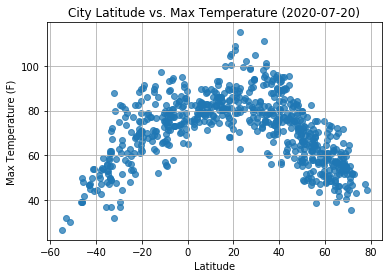

In [11]:

tmpDate = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%Y-%m-%d')

plt.scatter(weather_data["Latitude"],weather_data["MaxTemp"], marker="o", alpha = 0.75)


plt.title("City Latitude vs. Max Temperature (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.savefig("Images/MaxTmp.png")


plt.show()

This code takes the max temperature for a city on a given day, and then plots that temperature on a graph based on the latitude of that city. The graph shows how the temperatures are much hotter the closer you get to the equator. 

## Latitude vs. Humidity Plot

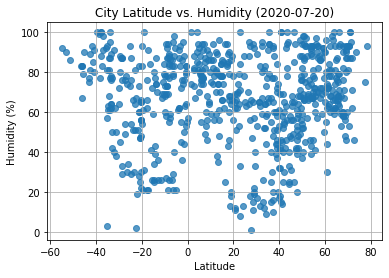

In [12]:

plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)


plt.title("City Latitude vs. Humidity (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


plt.savefig("Images/Humidity.png")


plt.show()

This code takes the humidity ofr a city on a given day, and then plots that humidity on a graph based on the latitude of that city. The graph shows that there is not a strong correlation between humidity and proximety to the equator. 

## Latitude vs. Cloudiness Plot

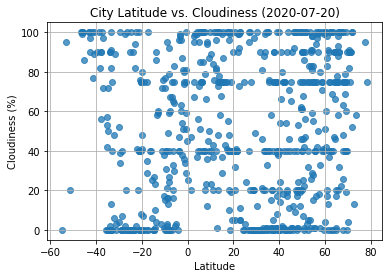

In [13]:

plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)


plt.title("City Latitude vs. Cloudiness (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


plt.savefig("Images/Cloudiness.png")


plt.show()

This code takes the cloudiness of a given city on a given day, and then plots that cloudiness based on the latitude. This shows that, much like the humidity, there is not much correlation between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

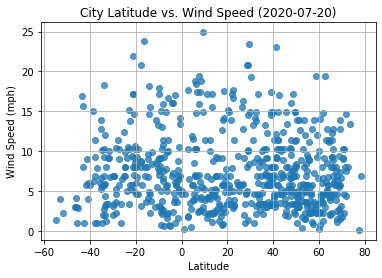

In [14]:

plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)


plt.title("City Latitude vs. Wind Speed (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


plt.savefig("Images/WindSpeed.png")


plt.show()

This code takes the wind speed in miles per hour in different cities and plots them based on latitude. There is not an obviuos correlation between the wind speed and prosimatey to the equator. 

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:

# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.51x + 92.86
The r-squared is: -0.6960081692574156


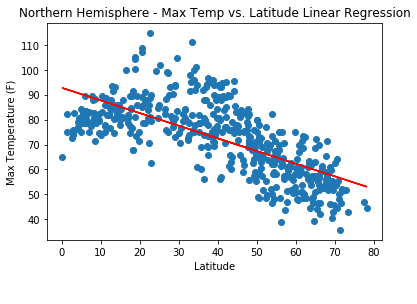

In [20]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['MaxTemp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is a negative and stastistically significant correlation in the norhtern hemisphere, as you move away from the equator the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.83x + 84.38
The r-squared is: 0.73870747976154


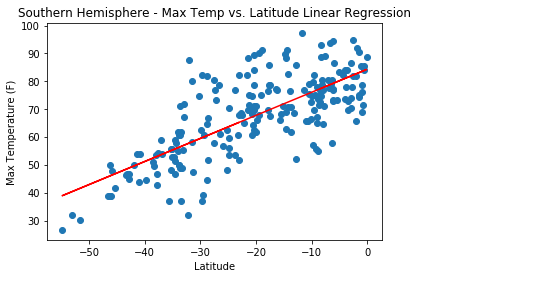

In [21]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['MaxTemp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is a positive and stastistically significant correlation in the southern hemisphere, as you move away from the equator the temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 64.31
The r-squared is: 0.06157071068886123


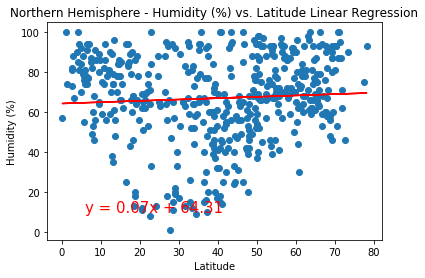

In [22]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is not a significant correlation between the humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.28x + 60.8
The r-squared is: -0.16639375563027295


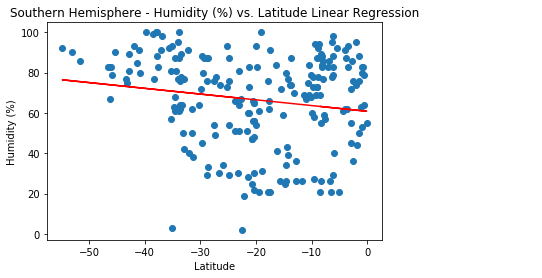

In [25]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is not a significant correlation between the humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 52.56
The r-squared is: 0.0005652029139079556


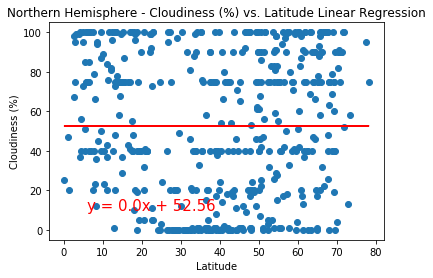

In [27]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is not a significant correlation between the cloudiness and latitude in the norhtern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.36x + 37.05
The r-squared is: -0.12712762918018947


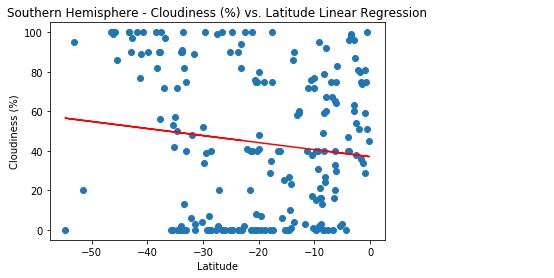

In [28]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is not a significant correlation between the cloudiness and latitude in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 7.95
The r-squared is: -0.09348713735268023


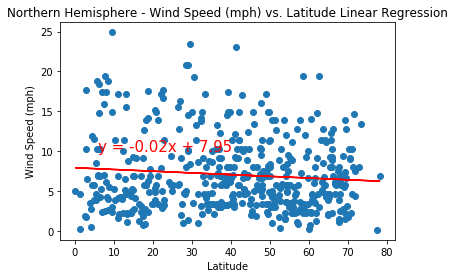

In [29]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()


There is not a significant correltaion between the wind speed and latitude in the northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 8.95
The r-squared is: 0.03238909499423899
The regression does not display much of a correlation between the data sets.


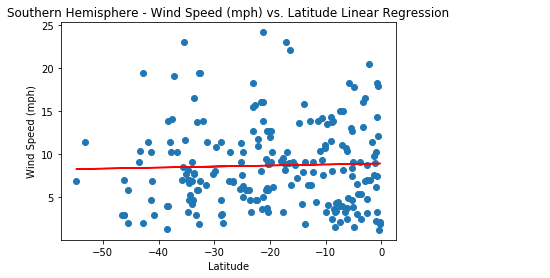

In [33]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

There is not a significant correlation between the wind speed and latitude in the southern hemisphere.